# Pymaceuticals Inc.
---

### Analysis

Welcome to Pymaceuticals! In this data set, we examine the impacts of various drug regimens on little mice who have tumors. 

The first section of this study is simply cleaning up the data and preparing it for use. The second section contains tables of summary statistics where we begin to see the average effects of the drug regimens on tumor volume. Based on the initial summary statistics, it appears that mice on the Capomulin and Ramicane regimens have the smallest tumors by volume.

The third section displays bar and pie charts that give us more information about the mice themselves. We can see fromthe bar charts that Capomulin and Ramicane were nearly tied for the the regimens with the largest number of test subjects, both sitting at around 250, while Propriva had the fewest test subjects at less than 150. The pie charts show that the test subjects across all regimens were almost evenly split between male and female (51% and 49%, respectively).

In the fourth section, we once again tidied up the dataframe to display the four regimens that resulted in the lowest tumor volumes and had the closest numbers of test subjects: Capomulin, Infubinol, Ceftamin, and Ramicane. We then isolated those values and used them to calculate quartiles and outliers. Of the four regimens tested, only Infubinol had one potential outlier--all others fell within the normal inter-quartile range. We then created a box plot based on this data to display the regimen's relationship to tumor volume. Capomulin and Ramicane once again had the lowest tumor volumes, but Capomulin's test subjects had tumor volumes that were in a very close range to one another, while Ramicane's fell across a slightly wider range.

Finally, we isolated Capomulin to analyze with line and scatter plots. The first line graph shows the relationship between the length in days of the regimen and the size of the tumor. As the number of days on the regimen increased, tumor volume experienced a fairly steady decline. The scatterplot shows the correlation between the weight of the mice and found a strong correlation value of 0.85--the heavier the mouse was, the greater the volume of the tumor.

Based on these findings, we can see that Capomulin has the highest rate of efficacy in reducing tumor volume, although the weight of the subject may influence the results.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

complete_metadata_df = pd.merge(mouse_metadata, study_results)

complete_metadata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
mouse_count = complete_metadata_df["Mouse ID"].nunique()
mouse_count

249

In [3]:
duplicate_mice = complete_metadata_df.loc[complete_metadata_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
duplicate_mice_df = complete_metadata_df.loc[complete_metadata_df["Mouse ID"]== "g989"]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
clean_mice_df = complete_metadata_df[complete_metadata_df["Mouse ID"].isin(duplicate_mice)==False]
clean_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
clean_mouse_count = clean_mice_df["Mouse ID"].nunique()
clean_mouse_count

248

## Summary Statistics

In [7]:
mean_tumor = clean_mice_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
med_tumor = clean_mice_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
var_tumor = clean_mice_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_dev_tumor = clean_mice_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
std_err_tumor = clean_mice_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summ_stats_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor,
    "Median Tumor Volume": med_tumor,
    "Tumor Volume Variance": var_tumor,
    "Tumor Volume Std. Dev.": std_dev_tumor,
    "Tumor Volume Std. Err.": std_err_tumor
})

summ_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
agg_summary_stats = clean_mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median","var","std", "sem"])
agg_summary_stats = pd.DataFrame(agg_summary_stats)

agg_summary_stats.columns = pd.MultiIndex.from_tuples(
    zip(["Tumor Volume (mm3)", "", "", "", ""], agg_summary_stats.columns))

agg_summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of Mice Tested Per Drug'}, xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

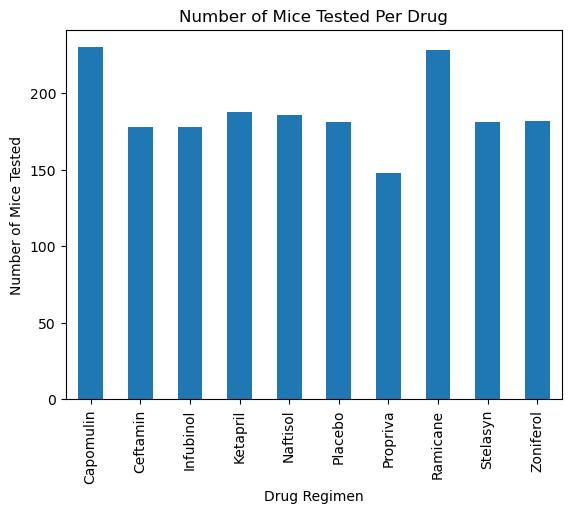

In [9]:

mice_per_drug = clean_mice_df.groupby(["Drug Regimen"])["Timepoint"].count()
mice_per_drug = pd.DataFrame(mice_per_drug)
mice_per_drug.columns = ["Number of Mice Tested"]

mice_per_drug.plot.bar(ylabel="Number of Mice Tested",xlabel="Drug Regimen", title="Number of Mice Tested Per Drug",
legend=False)


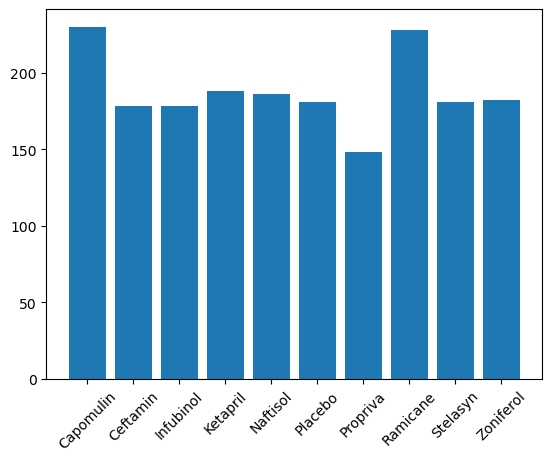

In [10]:
mice_per_drug = clean_mice_df.groupby(["Drug Regimen"])["Timepoint"].count()
mice_per_drug = pd.DataFrame(mice_per_drug)
mice_per_drug.columns = ["Number of Mice Tested"]
mice_per_drug = mice_per_drug.reset_index()

plt.bar(x=(mice_per_drug["Drug Regimen"]), height=(mice_per_drug["Number of Mice Tested"]))
plt.xlabel="Drug Regimen"
plt.ylabel="Number of Mice Tested"
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:title={'center':'Percentage of Male v. Female Mice'}, ylabel='Mouse ID'>

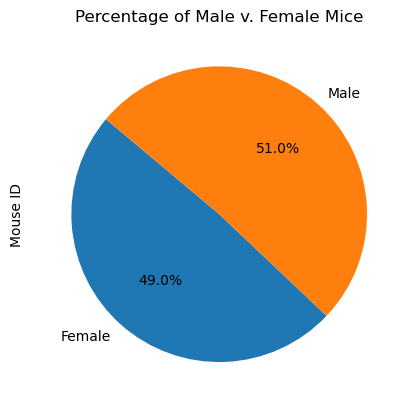

In [20]:
mice_per_drug = clean_mice_df.groupby(["Sex"])["Mouse ID"].count()
mice_per_drug = pd.DataFrame(mice_per_drug)
mice_per_drug = mice_per_drug.reset_index()
labels = ["Female", "Male"]
mice_per_drug.plot(kind="pie", y="Mouse ID", labels=labels, autopct="%1.1f%%", startangle=140, 
title="Percentage of Male v. Female Mice", legend=None)


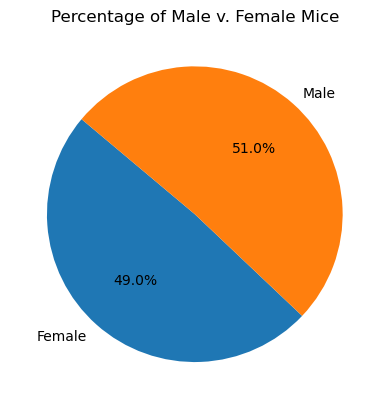

In [21]:
mice_per_drug = clean_mice_df.groupby(["Sex"])["Mouse ID"].count()
mice_per_drug = pd.DataFrame(mice_per_drug)
mice_per_drug = mice_per_drug.reset_index()
labels = ["Female", "Male"]

plt.pie((mice_per_drug["Mouse ID"]), labels=labels, autopct="%1.1f%%", startangle=140)
plt.title("Percentage of Male v. Female Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
max_tumor = clean_mice_df.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()

clean_mice_merge_df = pd.merge(clean_mice_df, max_tumor)
clean_mice_merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [14]:
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

tumor_vol_data = []

for treatment in treatments:
    treatment_df = clean_mice_merge_df.loc[(clean_mice_merge_df["Drug Regimen"] == treatment), "Tumor Volume (mm3)"]
    df_quartiles = treatment_df.quantile([.25,.5,.75])
    tumor_vol_data.append(treatment_df)
    lowerq = df_quartiles[.25]
    upperq = df_quartiles[.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = treatment_df.loc[(treatment_df < lower_bound) | (treatment_df > upper_bound)]
    print(f"{treatment}'s potential outliers: {len(outliers)}")
    
    

Capomulin's potential outliers: 0
Ramicane's potential outliers: 0
Infubinol's potential outliers: 1
Ceftamin's potential outliers: 0


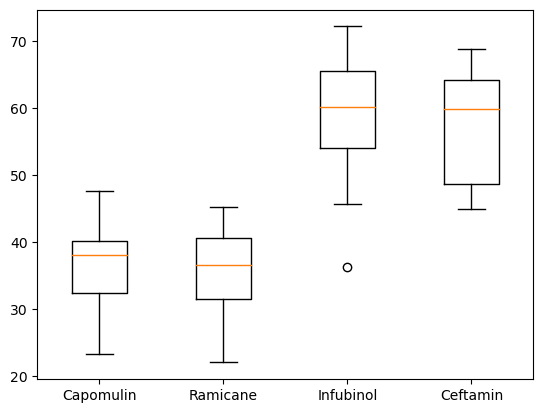

In [45]:
plt.boxplot(tumor_vol_data, labels=treatments)
plt.xlabel("Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

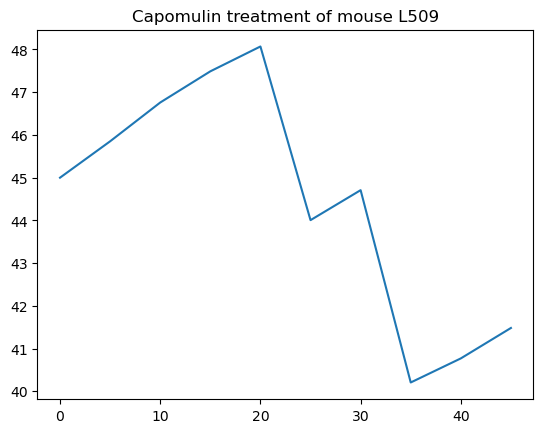

In [46]:
cap_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Capomulin"]
mousedata = cap_df.loc[cap_df["Mouse ID"] == "l509"]
plt.plot(mousedata["Timepoint"], mousedata["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse L509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


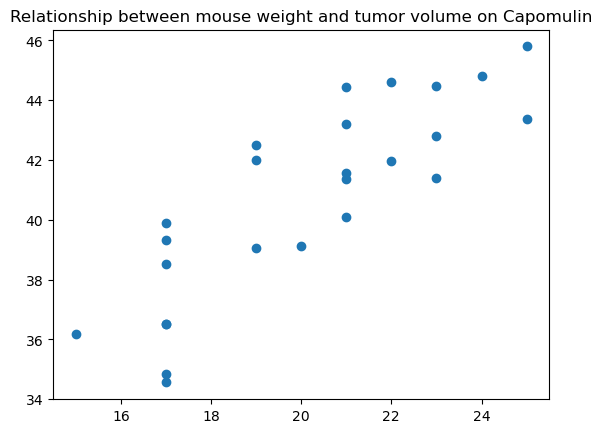

In [17]:
avg_weight = cap_df.groupby(["Mouse ID"]).mean()
plt.scatter(avg_weight["Weight (g)"], avg_weight["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Relationship between mouse weight and tumor volume on Capomulin")
plt.show()

## Correlation and Regression

Correlation: 0.8419363424694721


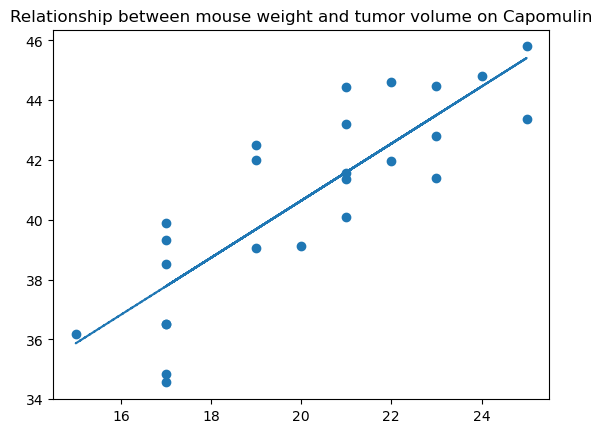

In [18]:
cap_slope, cap_int, cap_r, cap_p, cap_std_err = st.linregress(avg_weight["Weight (g)"], avg_weight["Tumor Volume (mm3)"])
cap_fit = cap_slope * avg_weight["Weight (g)"] + cap_int

print(f"Correlation: {cap_r}")

avg_weight = cap_df.groupby(["Mouse ID"]).mean()
plt.scatter(avg_weight["Weight (g)"], avg_weight["Tumor Volume (mm3)"])
plt.plot(avg_weight["Weight (g)"], cap_fit, "--")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Relationship between mouse weight and tumor volume on Capomulin")
plt.show()